# Using Web Scraping to collect data and creating a linear regression model

In this project, we'll gather our data from arabam.com, one of the websites for auto sales, and at the end of the day, we'll create a linear regression model to forecast the price of a car with the help of given details. 

Let's get going!

In [11]:
# importing libraries

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time, os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [13]:
# create pages list for arabam.com to get each car's link

In [14]:
def get_pages_list():
    first_page = "https://www.arabam.com/ikinci-el/otomobil?take=50"
    page_list = []
    for i in range(2, 50):
        page_list.append(first_page + "&page=" + str(i))
    
    return page_list


In [15]:
get_pages_list()

['https://www.arabam.com/ikinci-el/otomobil?take=50&page=2',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=3',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=4',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=5',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=6',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=7',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=8',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=9',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=10',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=11',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=12',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=13',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=14',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=15',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=16',
 'https://www.arabam.com/ikinci-el/otomobil?take=50&page=17',
 'https://www.ar

In [16]:
def scroll_down():
    for j in range(2):
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")  # Kaydırma İşlemi
        time.sleep(1)  # wait for one second after each scroll


In [17]:
# defining chrome driver path

In [2]:
chrome_driver_path = "/Users/zehragul/Documents/Development/chromedriver"
service = ChromeService(executable_path=chrome_driver_path)
driver = webdriver.Chrome(service=service)

In [ ]:
# getting all the sale cars links and writing them into car_list.txt

In [ ]:
page_list = get_pages_list()
links_list = []

for page in page_list:
    
    soup = BeautifulSoup(driver.page_source, "html.parser")
    links = soup.find_all(name="a", class_="link-overlay")

    driver.get(page)
    for link in links:
        item_link = "https://www.arabam.com" + link.get('href')
        
        if item_link not in links_list:
            links_list.append(item_link)
        

print(f"link sayisi :  {len(links_list)}")
print(links_list)

with open("car_list.txt","w") as data_file:
    for link in links_list:
        data_file.write(link+ "\n")



driver.quit()

In [ ]:
# getting information about the car like price, age, brand, model etc. and writing them into cars.csv file

In [ ]:
with open("car_list.txt","r") as data_file:
    cars = data_file.readlines()


result = []

for car in cars:

    driver.get(cars)
    driver.implicitly_wait(2)
    scroll_down()


    try:
        fiyat = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/div[1]/div/div').text.replace("TL","")
        fiyat = fiyat.replace(".", "")
    except:
        fiyat = np.nan
    
    try:
        yil = int(driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[6]/span[2]').text)
    except:
        yil = np.nan
    
    try:
        marka = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[3]/span[2]').text
    except:
        marka = np.nan
    
    try:
        seri = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[4]/span[2]').text
    except:
        seri = np.nan
    
    try:
        model = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[5]/span[2]').text
    except:
        model = np.nan

    try:
        kilometre = float(driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[7]/span[2]').text.replace("km","").strip())
    except:
        kilometre = np.nan
    
    try:
        vites_tipi = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[8]/span[2]').text
    except:
        vites_tipi = np.nan
    
    try:
        yakit_tipi = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[9]/span[2]').text
    except:
        yakit_tipi = np.nan
    
    try:
        motor_hacmi = float(driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[11]/span[2]').text.replace("cc",""))
    except:
        motor_hacmi = np.nan
    
    try:
        motor_gucu = float(driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[12]/span[2]').text.replace("hp",""))
    except:
        motor_gucu = np.nan

    try:
        cekis = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[13]/span[2]').text
    except:
        cekis = np.nan
    
    try:
        yakit_deposu = float(driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[15]/span[2]').text.replace("lt",""))
    except:
        yakit_deposu = np.nan
    
    try:
        boya_degisen = driver.find_element(by=By.XPATH, value='//*[@id="js-hook-for-observer-detail"]/div[2]/ul/li[16]/a').text
    except:
        boya_degisen = np.nan
    
    new_row =[fiyat,yil,renk, marka , seri , model, kilometre, vites_tipi, yakit_tipi, cekis, ort_yakit_tuk, yakit_deposu,tork, motor_hacmi, motor_gucu, koltuk_sayisi, boya_degisen]
    result.append(new_row)

    
columns = ["fiyat", "yil", "marka" , "seri" , "model", "kilometre", "vites_tipi", "yakit_tipi", "cekis", "ort_yakit_tuk", "yakit_deposu", "motor_hacmi", "motor_gucu", "boya_degisen"]
df = pd.DataFrame.from_records(result, columns=columns)
df.to_csv("cars.csv", index_label=False)
print(f"link sayisi :  {len(result)}")

In [3]:
cars = pd.read_csv("cars.csv")

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2153 non-null   int64  
 1   fiyat         2153 non-null   int64  
 2   yil           2147 non-null   float64
 3   renk          0 non-null      float64
 4   marka         2153 non-null   object 
 5   seri          2153 non-null   object 
 6   model         2153 non-null   object 
 7   kilometre     2146 non-null   float64
 8   vites_tipi    2151 non-null   object 
 9   yakit_tipi    2153 non-null   object 
 10  cekis         2105 non-null   object 
 11  yakit_deposu  1853 non-null   float64
 12  motor_hacmi   2068 non-null   float64
 13  motor_gucu    2058 non-null   float64
 14  boya_degisen  1140 non-null   object 
dtypes: float64(6), int64(2), object(7)
memory usage: 252.4+ KB


In [5]:
cars.drop(["Unnamed: 0","renk"], axis= 1, inplace=True)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fiyat         2153 non-null   int64  
 1   yil           2147 non-null   float64
 2   marka         2153 non-null   object 
 3   seri          2153 non-null   object 
 4   model         2153 non-null   object 
 5   kilometre     2146 non-null   float64
 6   vites_tipi    2151 non-null   object 
 7   yakit_tipi    2153 non-null   object 
 8   cekis         2105 non-null   object 
 9   yakit_deposu  1853 non-null   float64
 10  motor_hacmi   2068 non-null   float64
 11  motor_gucu    2058 non-null   float64
 12  boya_degisen  1140 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 218.8+ KB


In [7]:
cars['boya_degisen'].value_counts()

Tamamı orjinal          354
1 boyalı                 92
2 boyalı                 86
3 boyalı                 62
4 boyalı                 45
1 değişen                42
1 değişen, 1 boyalı      29
1 değişen, 2 boyalı      29
1 değişen, 4 boyalı      27
1 değişen, 3 boyalı      27
2 değişen, 2 boyalı      25
5 boyalı                 24
1 değişen, 5 boyalı      19
2 değişen                19
Tamamı boyalı            17
6 boyalı                 16
2 değişen, 3 boyalı      16
2 değişen, 1 boyalı      15
2 değişen, 4 boyalı      13
8 boyalı                 10
12 boyalı                10
3 değişen, 3 boyalı       9
1 değişen, 9 boyalı       9
7 boyalı                  9
9 boyalı                  9
1 değişen, 8 boyalı       8
3 değişen, 4 boyalı       8
3 değişen                 8
1 değişen, 6 boyalı       7
2 değişen, 7 boyalı       7
2 değişen, 6 boyalı       7
10 boyalı                 7
3 değişen, 1 boyalı       6
1 değişen, 7 boyalı       6
1 değişen, 12 boyalı      6
2 değişen, 8 boyalı 

boya_degisen sutunundaki ifadeleri boyali_parca ve degisen_parca olarak duzenlemek icin satirlari tek tek okuttuk

In [8]:
for i in range(len(cars)):
    boya_degisen = str(cars.loc[i, 'boya_degisen'])

    if len(boya_degisen.split(",")) == 1:
        # "1 degisen", "2 boyali" ,"Tamami orjinal" veya "Tamami boyali"seklinde olanlar icin

        if len(boya_degisen.strip().split(" ")) > 1 and ('boyalı' == boya_degisen.strip().split(" ")[1]):
            cars.loc[i, 'boyali_parca'] = boya_degisen.split(" ")[0]
            cars.loc[i, 'degisen_parca'] = 0
        elif len(boya_degisen.strip().split(" ")) > 1 and ('değişen' == boya_degisen.strip().split(" ")[1]):
            cars.loc[i, 'degisen_parca'] = boya_degisen.split(" ")[0]
            cars.loc[i, 'boyali_parca'] = 0

        elif len(boya_degisen.strip().split(" ")) > 1 and ("Tamamı orjinal" == boya_degisen.strip()):
            cars.loc[i, 'degisen_parca'] = "Tamamı orjinal"
            cars.loc[i, 'boyali_parca'] = "Tamamı orjinal"

        elif len(boya_degisen.strip().split(" ")) > 1 and ("Tamamı boyalı" == boya_degisen.strip()):
            cars.loc[i, 'boyali_parca'] = "Tamamı boyalı"
            cars.loc[i, 'degisen_parca'] = "0"
        else:

            cars.loc[i, 'boyali_parca'] = "0"
            cars.loc[i, 'degisen_parca'] = "0"

    if len(boya_degisen.split(",")) == 2:
        # "2 değişen, 4 boyalı" seklinde olanlar icin
        if 'boyalı' == boya_degisen.strip().split(",")[1].strip().split(" ")[1]:
            cars.loc[i,'boyali_parca'] = boya_degisen.split(",")[1].strip().split(" ")[0]

        if 'değişen' == boya_degisen.strip().split(",")[0].strip().split(" ")[1]:
            cars.loc[i, 'degisen_parca'] = boya_degisen.split(",")[0].strip().split(" ")[0]

cars.to_csv("new.csv") 

In [9]:

new_df = pd.read_csv("new.csv")

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2153 non-null   int64  
 1   fiyat          2153 non-null   int64  
 2   yil            2147 non-null   float64
 3   marka          2153 non-null   object 
 4   seri           2153 non-null   object 
 5   model          2153 non-null   object 
 6   kilometre      2146 non-null   float64
 7   vites_tipi     2151 non-null   object 
 8   yakit_tipi     2153 non-null   object 
 9   cekis          2105 non-null   object 
 10  yakit_deposu   1853 non-null   float64
 11  motor_hacmi    2068 non-null   float64
 12  motor_gucu     2058 non-null   float64
 13  boya_degisen   1140 non-null   object 
 14  boyali_parca   2153 non-null   object 
 15  degisen_parca  2153 non-null   object 
dtypes: float64(5), int64(2), object(9)
memory usage: 269.2+ KB


In [11]:
new_df.columns

Index(['Unnamed: 0', 'fiyat', 'yil', 'marka', 'seri', 'model', 'kilometre',
       'vites_tipi', 'yakit_tipi', 'cekis', 'yakit_deposu', 'motor_hacmi',
       'motor_gucu', 'boya_degisen', 'boyali_parca', 'degisen_parca'],
      dtype='object')

In [12]:
new_df.drop(["Unnamed: 0"], axis= 1, inplace=True)

In [13]:
new_df.drop(["boya_degisen"], axis= 1, inplace=True)

In [14]:
new_df.head()


,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
0,125000,2006.0,Ford,Fiesta,1.4 TDCi Comfort,400.0,Düz,Dizel,Önden Çekiş,45.0,1399.0,68.0,0,0
1,1499750,2013.0,Mercedes - Benz,E,250 CDI Premium,145.0,Otomatik,Dizel,4WD (Sürekli),59.0,2143.0,204.0,0,0
2,515000,2016.0,Volkswagen,Golf,1.6 TDi BlueMotion Midline Plus,169.0,Düz,Dizel,Önden Çekiş,50.0,1598.0,90.0,Tamamı orjinal,Tamamı orjinal
3,405000,2012.0,Ford,Focus,1.6 TDCi Trend X,225.0,Düz,Dizel,Önden Çekiş,53.0,1560.0,95.0,6,0
4,710000,2013.0,Audi,A3,A3 Sedan 1.6 TDI Ambition,185.0,Yarı Otomatik,Dizel,Önden Çekiş,50.0,1598.0,105.0,2,1


In [15]:
new_df.sample(15)

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
503,170000,2001.0,Citroen,Xsara,Picasso 1.6 SX,295.0,Düz,LPG & Benzin,Önden Çekiş,55.0,1587.0,96.0,7,2
1927,520000,2017.0,Renault,Megane,1.5 dCi Touch,200.0,Yarı Otomatik,Dizel,Önden Çekiş,49.0,1461.0,110.0,Tamamı orjinal,Tamamı orjinal
1346,613000,2015.0,Seat,Leon,1.6 TDI Style,121.0,Düz,Dizel,Önden Çekiş,50.0,1598.0,110.0,0,0
1139,210000,1996.0,Volkswagen,Golf,1.9 TD,275.0,Düz,Dizel,NaN,NaN,NaN,NaN,0,0
1486,355000,2014.0,Renault,Fluence,1.5 dCi Touch,260.0,Yarı Otomatik,Dizel,Önden Çekiş,60.0,1461.0,110.0,3,0
1978,220000,2005.0,Renault,Clio,1.2 Authentique,221.0,Düz,LPG & Benzin,Önden Çekiş,55.0,1149.0,75.0,Tamamı orjinal,Tamamı orjinal
684,345000,2017.0,Renault,Symbol,1.5 dCi Joy,177.0,Düz,Dizel,Önden Çekiş,50.0,1461.0,90.0,0,0
1811,395000,2011.0,Renault,Megane,1.5 dCi Dynamique,153.0,Yarı Otomatik,Dizel,Önden Çekiş,60.0,1461.0,110.0,0,0
2086,247000,2006.0,Toyota,Yaris,1.4 D-4D Terra,189.0,Düz,Dizel,Önden Çekiş,42.0,1364.0,90.0,5,0
623,625000,2016.0,Volkswagen,Golf,1.4 TSi Comfortline,102.0,Düz,Benzin,Önden Çekiş,50.0,1395.0,122.0,0,0


In [16]:
new_df.describe()

,fiyat,yil,kilometre,yakit_deposu,motor_hacmi,motor_gucu
count,2.153000e+03,2147.000000,2146.000000,1853.000000,2068.000000,2058.000000
mean,4.484800e+05,2009.862133,178.826028,52.685915,1512.255803,109.445578
std,5.615385e+05,7.860124,95.593306,8.137427,287.637469,62.533345
min,4.000000e+03,1977.000000,0.000000,30.000000,130.000000,41.000000
25%,2.350000e+05,2005.000000,110.048750,45.000000,1390.000000,90.000000
50%,3.500000e+05,2012.000000,173.000000,50.000000,1498.000000,100.000000
75%,5.200000e+05,2016.000000,242.000000,57.000000,1598.000000,120.000000
max,1.235000e+07,2023.000000,830.000000,95.000000,5200.000000,1599.000000


In [17]:
new_df.isnull().sum() # checking empthy values

fiyat              0
yil                6
marka              0
seri               0
model              0
kilometre          7
vites_tipi         2
yakit_tipi         0
cekis             48
yakit_deposu     300
motor_hacmi       85
motor_gucu        95
boyali_parca       0
degisen_parca      0
dtype: int64

In [18]:
new_df.vites_tipi.sort_values().value_counts()

Düz              1297
Otomatik          445
Yarı Otomatik     405
LPG & Benzin        2
Benzin              1
Elektrik            1
Name: vites_tipi, dtype: int64

In [19]:
new_df.yakit_tipi.sort_values().value_counts()

Dizel           1019
LPG & Benzin     655
Benzin           467
Hibrit             5
Elektrik           3
Sedan              3
Roadster           1
Name: yakit_tipi, dtype: int64

In [20]:
new_df[new_df.yakit_tipi=="Sedan"]

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
749,4000,NaN,Renault,Zoe,2020,NaN,Elektrik,Sedan,NaN,NaN,NaN,NaN,0,0
1817,63000,NaN,Tofaş,Serçe,1993,NaN,LPG & Benzin,Sedan,44 lt,NaN,NaN,NaN,0,0
1876,62500,NaN,Tofaş,Serçe,1992,NaN,LPG & Benzin,Sedan,44 lt,NaN,NaN,NaN,0,0


In [21]:
new_df[new_df.yakit_tipi=="Roadster"]

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
335,855000,NaN,Porsche,Boxster,2001,NaN,Benzin,Roadster,NaN,NaN,NaN,NaN,0,0


In [22]:
new_df.drop(index=[749,1817,1876], axis=0, inplace=True) # yakit_tipi Sedan olanlari kaldirdik

In [23]:
new_df.drop(index=[335], axis=0, inplace=True) # yakit_tipi Roadster olanlari kaldirdik

In [24]:
new_df.yakit_tipi.sort_values().value_counts()

Dizel           1019
LPG & Benzin     655
Benzin           467
Hibrit             5
Elektrik           3
Name: yakit_tipi, dtype: int64

In [25]:
new_df.loc[new_df.kilometre.isnull()]

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
415,85000,NaN,Tofaş,Serçe,1992,NaN,NaN,LPG & Benzin,NaN,NaN,NaN,NaN,0,0
1096,55000,NaN,Tofaş,Serçe,1990,NaN,NaN,LPG & Benzin,NaN,NaN,NaN,NaN,0,0
1367,108000,1990.0,BMW,3 Serisi,316i Standart,NaN,Düz,LPG & Benzin,Arkadan İtiş,NaN,1596.0,99.0,0,0


In [26]:
new_df.drop(index=[415,1096,1367], axis=0, inplace=True)

In [27]:
new_df.yakit_tipi.value_counts()

Dizel           1019
LPG & Benzin     652
Benzin           467
Hibrit             5
Elektrik           3
Name: yakit_tipi, dtype: int64

In [28]:
new_df.vites_tipi.value_counts()

Düz              1296
Otomatik          445
Yarı Otomatik     405
Name: vites_tipi, dtype: int64

In [29]:
new_df.degisen_parca.value_counts()

0                 1398
Tamamı orjinal     354
1                  215
2                  118
3                   48
4                   11
6                    1
5                    1
Name: degisen_parca, dtype: int64

In [30]:
# "Tamami orjinal" olanlar icin 20 degeri atadik

new_df['degisen_parca'] = new_df['degisen_parca'].apply(lambda x: x.replace("Tamamı orjinal","20"))

In [31]:
new_df.degisen_parca.value_counts()

0     1398
20     354
1      215
2      118
3       48
4       11
6        1
5        1
Name: degisen_parca, dtype: int64

In [32]:
new_df.boyali_parca.value_counts()

0                 1076
Tamamı orjinal     354
2                  142
1                  142
3                  116
4                   95
5                   52
6                   31
8                   29
7                   28
9                   26
Tamamı              17
12                  16
10                  12
11                  10
Name: boyali_parca, dtype: int64

In [33]:
# Tamami orjinal olanlar icin 20 degeri atadik
# Tamami boyali olanlar icin 30 degeri atadik

new_df['boyali_parca'] = new_df['boyali_parca'].apply(lambda x: x.replace("Tamamı orjinal","20"))
new_df['boyali_parca'] = new_df['boyali_parca'].apply(lambda x: x.strip().replace("Tamamı","30"))

In [34]:
new_df.boyali_parca.value_counts()

0     1076
20     354
2      142
1      142
3      116
4       95
5       52
6       31
8       29
7       28
9       26
30      17
12      16
10      12
11      10
Name: boyali_parca, dtype: int64

In [35]:
new_df[new_df.yakit_deposu.isnull()]

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
8,55000,1988.0,Tofaş,Kartal,Kartal 5 Vites,129.4,Düz,LPG & Benzin,Arkadan İtiş,NaN,1581.0,83.0,0,0
14,150000,1981.0,Mercedes - Benz,E,200,500.0,Düz,LPG & Benzin,Önden Çekiş,NaN,1997.0,98.0,0,0
25,120000,2000.0,Fiat,Uno,1.4 ie S,252.0,Düz,LPG & Benzin,Önden Çekiş,NaN,1372.0,71.0,0,0
26,175000,1997.0,Peugeot,406,2.0 SV,330.0,Düz,LPG & Benzin,Önden Çekiş,NaN,1998.0,149.0,0,0
34,170000,2000.0,Renault,R 19,1.6 Europa iE,313.0,Düz,LPG & Benzin,Önden Çekiş,NaN,1598.0,90.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,45000,1993.0,Lada,Samara,1.5,500.0,Düz,LPG & Benzin,Önden Çekiş,NaN,NaN,NaN,0,0
2143,130000,1999.0,Tofaş,Şahin,1.6,56.8,Düz,LPG & Benzin,52 lt,NaN,1581.0,NaN,0,0
2144,115750,1997.0,Renault,Twingo,1.2 Base,249.0,Düz,Benzin,Önden Çekiş,NaN,1149.0,58.0,0,0
2147,125000,1997.0,Daewoo,Nexia,1.5 GL,330.0,Düz,LPG & Benzin,Önden Çekiş,NaN,1498.0,80.0,0,0


In [36]:
new_df.dropna(inplace=True)

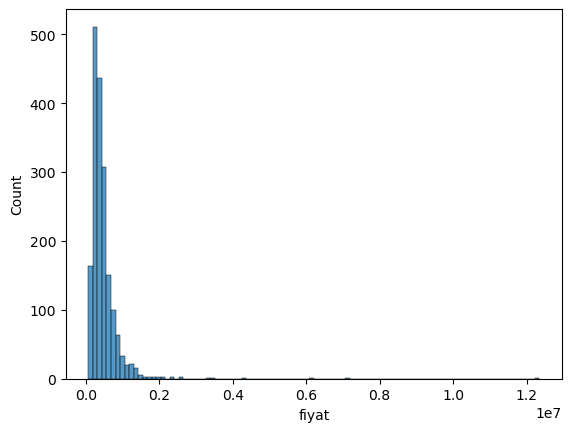

In [37]:
sns.histplot(data = new_df['fiyat'], bins=100);

In [38]:
new_df['fiyat_log'] = np.log(new_df['fiyat'])

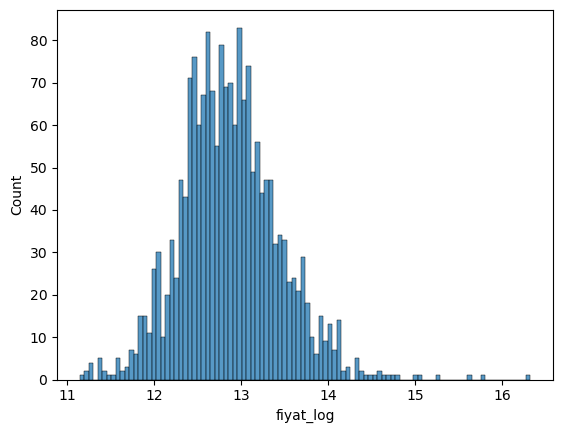

In [39]:
sns.histplot(data = new_df['fiyat_log'], bins=100);

In [40]:
subset = ['fiyat','yil','kilometre','yakit_deposu','motor_hacmi','motor_gucu']

cars = new_df.loc[:,subset]

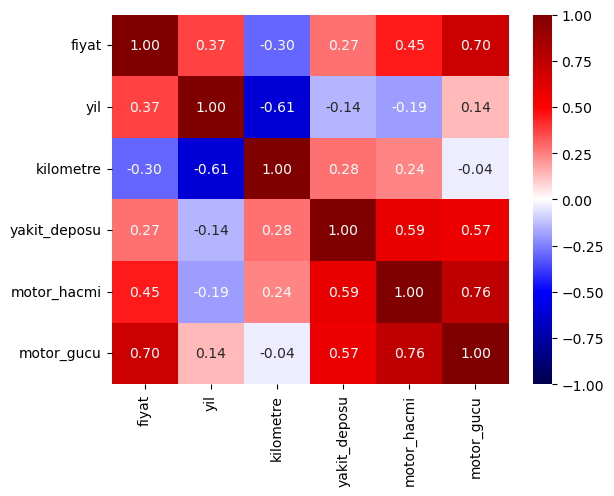

In [41]:
plt.plot()
sns.heatmap(cars.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [42]:
cars.corr()['fiyat'].sort_values(ascending=False)

fiyat           1.000000
motor_gucu      0.702992
motor_hacmi     0.447621
yil             0.367998
yakit_deposu    0.273799
kilometre      -0.297390
Name: fiyat, dtype: float64

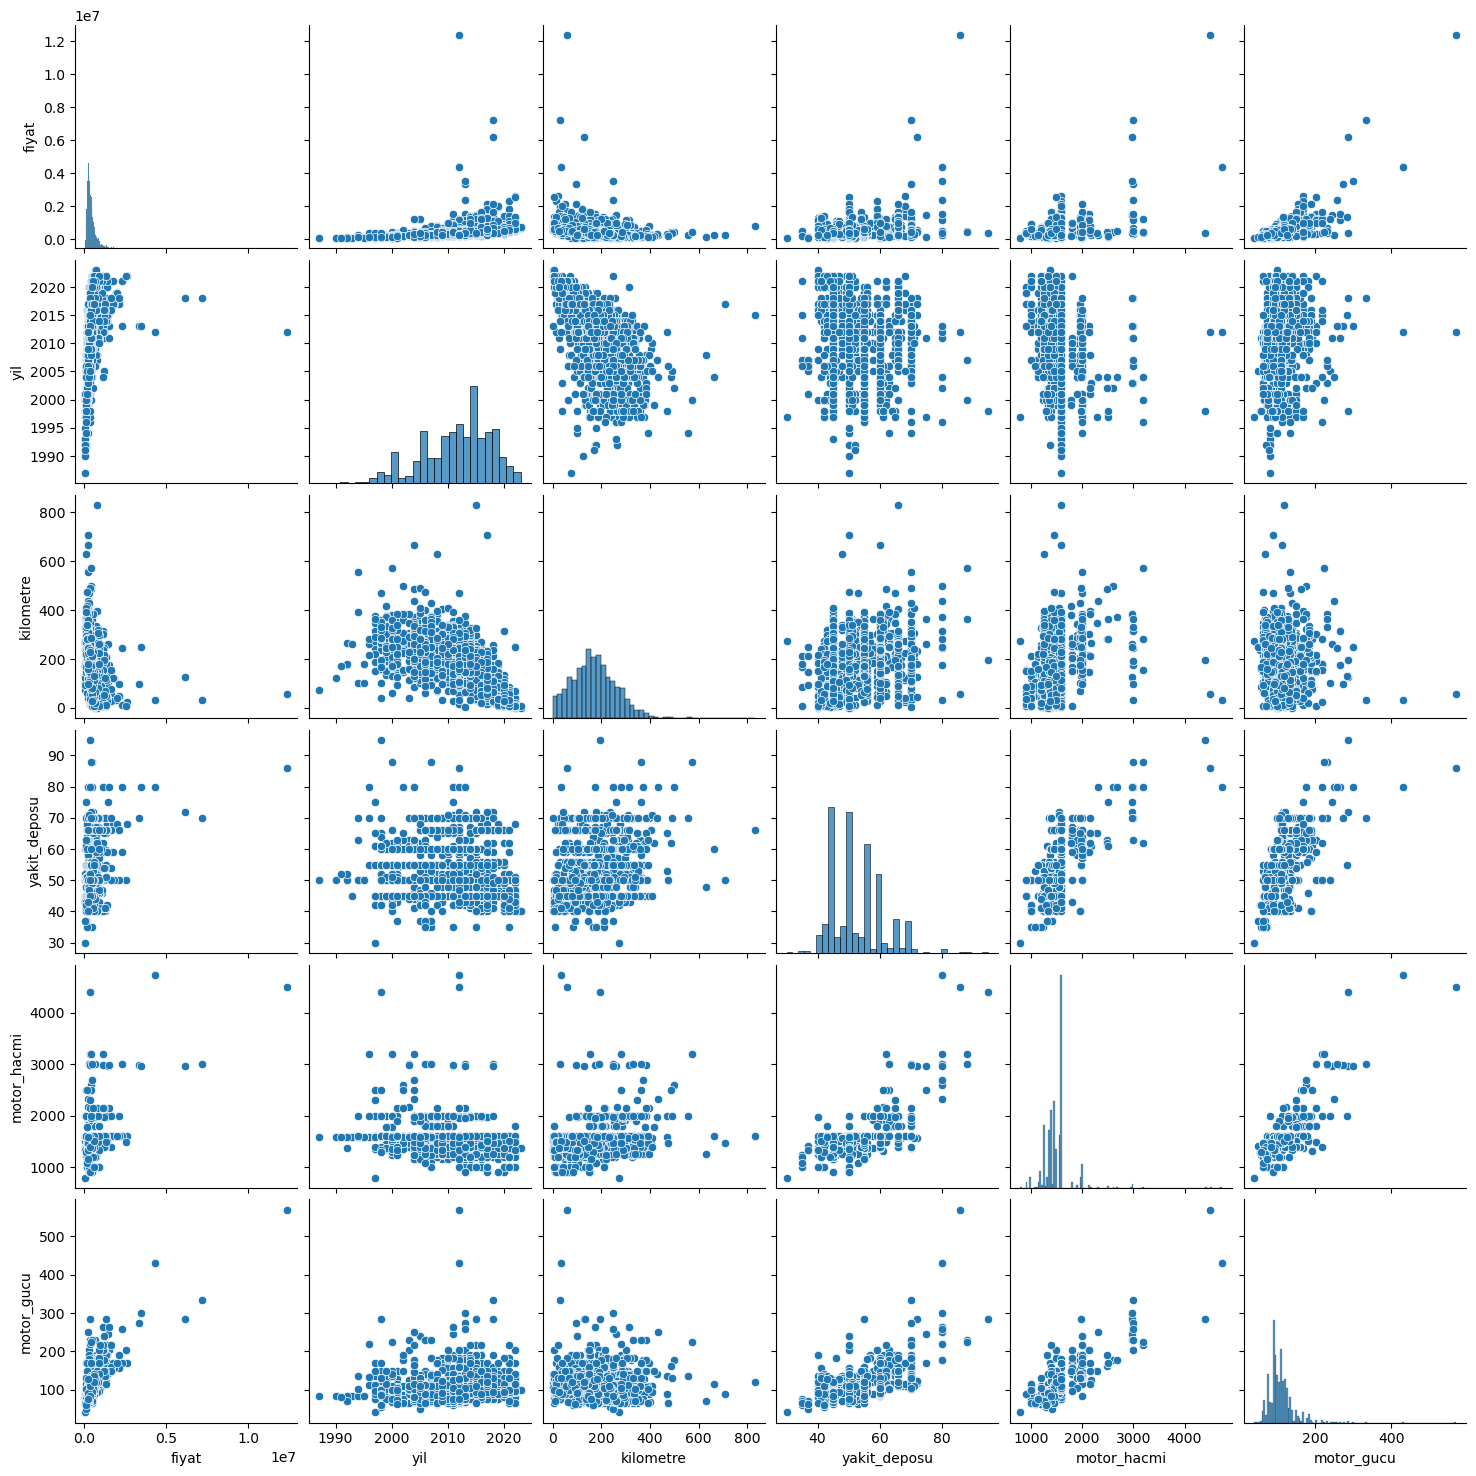

In [43]:
sns.pairplot(cars);

In [44]:
#Training Asamasi

In [45]:

X = cars.drop(columns=['fiyat']) 
y = cars['fiyat']

# Veri setinin %20'lik kısmını Test aşaması için saklıyoruz
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print("X:", X.shape)
print("y:", y.shape)
print("X_test:", X_test.shape)
print("y_test", y_test.shape)

X: (1480, 5)
y: (1480,)
X_test: (371, 5)
y_test (371,)


In [47]:
#validation kismini ayirma
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val", y_val.shape)

X_train: (1110, 5)
y_train: (1110,)
X_val: (370, 5)
y_val (370,)


In [49]:
# Lineer Regresyon
# Modeli Oluşturma
lr1 = LinearRegression()

# Featureları Oluşturma
X = cars.iloc[:, 1:]

# Targetı Oluşturma
y = cars.iloc[:, 0]

# Modeli Eğitme
lr1.fit(X, y)

# R2 Değeri
r_squared1 = lr1.score(X,y)
print("R2:", round(r_squared1,3))

# Adjusted R2 Değeri
adjusted_r_squared1 = 1 - (1-r_squared1)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared1,3))


R2: 0.59
Adjusted R2: 0.589


In [50]:
# statsmodels
# Modeli Oluşturma
stmodel1 = smf.ols('fiyat ~ yil + kilometre + yakit_deposu + motor_hacmi + motor_gucu', data=cars)

# Modeli Eğitme
stmod1 =stmodel1.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
stmod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fiyat   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     531.2
Date:                Sun, 29 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:09:41   Log-Likelihood:                -25965.
No. Observations:                1851   AIC:                         5.194e+04
Df Residuals:                    1845   BIC:                         5.198e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.836e+07   3.11e+06     -9.109      0.000   -3.45e+07   -2.23e+07
yil           1.392e+04   1539.434      9.044      0.000    1.09e+04    1.69e+04
kilometre     -797.8514     99.664     -8.005      0.000    -993.317    -602.386
yakit_deposu -3896.6427   1132.850     -3.440      0.001   -6118.445   -1674.840
motor_hacmi     88.2263     45.093      1.957      0.051      -0.213     176.666
motor_gucu    9526.1796    379.304     25.115      0.000    8782.269    1.03e+04
==============================================================================
Omnibus:                     3049.579   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3908519.157
Skew:                          10.345   Prob(JB):                         0.00
Kurtosis:                     227.164   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# marka , yakit-tipi, vites_tipi ve cekis ozellikleri icin dummy variable olusturma
cars = pd.get_dummies(new_df, columns=['marka', 'vites_tipi', 'yakit_tipi','cekis'], drop_first=True)
cars

,fiyat,yil,seri,model,kilometre,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca,...,marka_Toyota,marka_Volkswagen,marka_Volvo,vites_tipi_Otomatik,vites_tipi_Yarı Otomatik,yakit_tipi_Dizel,yakit_tipi_Hibrit,yakit_tipi_LPG & Benzin,cekis_Arkadan İtiş,cekis_Önden Çekiş
0,125000,2006.0,Fiesta,1.4 TDCi Comfort,400.0,45.0,1399.0,68.0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1499750,2013.0,E,250 CDI Premium,145.0,59.0,2143.0,204.0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,515000,2016.0,Golf,1.6 TDi BlueMotion Midline Plus,169.0,50.0,1598.0,90.0,20,20,...,0,1,0,0,0,1,0,0,0,1
3,405000,2012.0,Focus,1.6 TDCi Trend X,225.0,53.0,1560.0,95.0,6,0,...,0,0,0,0,0,1,0,0,0,1
4,710000,2013.0,A3,A3 Sedan 1.6 TDI Ambition,185.0,50.0,1598.0,105.0,2,1,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,345000,2013.0,Polo,1.4 Chrome Edition,145.0,45.0,1390.0,85.0,2,0,...,0,1,0,0,0,0,0,1,0,1
2148,270000,2012.0,Symbol,1.2 Authentique Edition,159.0,50.0,1149.0,75.0,20,20,...,0,0,0,0,0,0,0,0,0,1
2149,349750,2005.0,Civic,1.6 i-VTEC ES,230.0,50.0,1590.0,110.0,10,0,...,0,0,0,1,0,0,0,1,0,1
2151,602750,2017.0,Focus,1.5 TDCi Trend X,129.0,55.0,1499.0,120.0,20,20,...,0,0,0,0,1,1,0,0,0,1


In [52]:
# veri tiplerini interger a cevirme
cars['boyali_parca'] = cars['boyali_parca'].astype(int)
cars['degisen_parca'] = cars['degisen_parca'].astype(int)
cars['yil'] = cars['yil'].astype(int)


In [53]:
# yili gunumuzden cikararak sayiyi kucultme
cars['yil'] = cars['yil'].apply(lambda x: 2023-x)

In [54]:
cars.head()

,fiyat,yil,seri,model,kilometre,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca,...,marka_Toyota,marka_Volkswagen,marka_Volvo,vites_tipi_Otomatik,vites_tipi_Yarı Otomatik,yakit_tipi_Dizel,yakit_tipi_Hibrit,yakit_tipi_LPG & Benzin,cekis_Arkadan İtiş,cekis_Önden Çekiş
0,125000,17,Fiesta,1.4 TDCi Comfort,400.0,45.0,1399.0,68.0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1499750,10,E,250 CDI Premium,145.0,59.0,2143.0,204.0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,515000,7,Golf,1.6 TDi BlueMotion Midline Plus,169.0,50.0,1598.0,90.0,20,20,...,0,1,0,0,0,1,0,0,0,1
3,405000,11,Focus,1.6 TDCi Trend X,225.0,53.0,1560.0,95.0,6,0,...,0,0,0,0,0,1,0,0,0,1
4,710000,10,A3,A3 Sedan 1.6 TDI Ambition,185.0,50.0,1598.0,105.0,2,1,...,0,0,0,0,1,1,0,0,0,1


In [55]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851 entries, 0 to 2152
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fiyat                     1851 non-null   int64  
 1   yil                       1851 non-null   int64  
 2   seri                      1851 non-null   object 
 3   model                     1851 non-null   object 
 4   kilometre                 1851 non-null   float64
 5   yakit_deposu              1851 non-null   float64
 6   motor_hacmi               1851 non-null   float64
 7   motor_gucu                1851 non-null   float64
 8   boyali_parca              1851 non-null   int64  
 9   degisen_parca             1851 non-null   int64  
 10  fiyat_log                 1851 non-null   float64
 11  marka_Aston Martin        1851 non-null   uint8  
 12  marka_Audi                1851 non-null   uint8  
 13  marka_BMW                 1851 non-null   uint8  
 14  marka_Ch

In [56]:
cars.drop(columns=['fiyat'], inplace=True)

In [57]:
cars.drop(columns=['seri','model'], inplace=True)

In [58]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851 entries, 0 to 2152
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yil                       1851 non-null   int64  
 1   kilometre                 1851 non-null   float64
 2   yakit_deposu              1851 non-null   float64
 3   motor_hacmi               1851 non-null   float64
 4   motor_gucu                1851 non-null   float64
 5   boyali_parca              1851 non-null   int64  
 6   degisen_parca             1851 non-null   int64  
 7   fiyat_log                 1851 non-null   float64
 8   marka_Aston Martin        1851 non-null   uint8  
 9   marka_Audi                1851 non-null   uint8  
 10  marka_BMW                 1851 non-null   uint8  
 11  marka_Chery               1851 non-null   uint8  
 12  marka_Chevrolet           1851 non-null   uint8  
 13  marka_Citroen             1851 non-null   uint8  
 14  marka_DS

In [59]:
cars.to_csv('cars_reg.csv') # last version of our dataset 

In [60]:
# reneming columns name for statsmodel
cars.rename(columns={'marka_Aston Martin':'marka_Aston_Martin','marka_DS Automobiles':'marka_DS_Automobiles','marka_Mercedes - Benz':'marka_Mercedes_Benz'}, inplace=True)

In [61]:
cars.rename(columns={'vites_tipi_Yarı Otomatik':'vites_tipi_Yarı_Otomatik',
'yakit_tipi_LPG & Benzin':'yakit_tipi_LPG_Benzin', 'cekis_Arkadan İtiş':'cekis_Arkadan_İtiş',
       'cekis_Önden Çekiş':'cekis_Önden_Çekiş'}, inplace=True)

In [62]:
cars.columns

Index(['yil', 'kilometre', 'yakit_deposu', 'motor_hacmi', 'motor_gucu',
       'boyali_parca', 'degisen_parca', 'fiyat_log', 'marka_Aston_Martin',
       'marka_Audi', 'marka_BMW', 'marka_Chery', 'marka_Chevrolet',
       'marka_Citroen', 'marka_DS_Automobiles', 'marka_Dacia', 'marka_Daewoo',
       'marka_Ferrari', 'marka_Fiat', 'marka_Ford', 'marka_Geely',
       'marka_Honda', 'marka_Hyundai', 'marka_Kia', 'marka_Lada', 'marka_MINI',
       'marka_Maserati', 'marka_Mazda', 'marka_Mercedes_Benz',
       'marka_Mitsubishi', 'marka_Nissan', 'marka_Opel', 'marka_Peugeot',
       'marka_Porsche', 'marka_Proton', 'marka_Renault', 'marka_Rover',
       'marka_Seat', 'marka_Skoda', 'marka_Suzuki', 'marka_Tata',
       'marka_Tofaş', 'marka_Toyota', 'marka_Volkswagen', 'marka_Volvo',
       'vites_tipi_Otomatik', 'vites_tipi_Yarı_Otomatik', 'yakit_tipi_Dizel',
       'yakit_tipi_Hibrit', 'yakit_tipi_LPG_Benzin', 'cekis_Arkadan_İtiş',
       'cekis_Önden_Çekiş'],
      dtype='object')

In [63]:
# creating X and y parameters

X = cars.loc[:,['yil','kilometre','yakit_deposu','motor_hacmi','motor_gucu','boyali_parca','degisen_parca',
                'marka_Aston_Martin','marka_Audi','marka_BMW','marka_Chery','marka_Chevrolet',
                'marka_Citroen','marka_DS_Automobiles','marka_Dacia','marka_Daewoo','marka_Ferrari',
                'marka_Fiat','marka_Ford','marka_Geely','marka_Honda','marka_Hyundai','marka_Kia',
                'marka_Lada','marka_MINI','marka_Maserati','marka_Mazda','marka_Mercedes_Benz',
                'marka_Mitsubishi','marka_Nissan','marka_Opel', 'marka_Peugeot',
       'marka_Porsche', 'marka_Proton', 'marka_Renault', 'marka_Rover',
       'marka_Seat', 'marka_Skoda', 'marka_Suzuki', 'marka_Tata',
       'marka_Tofaş', 'marka_Toyota', 'marka_Volkswagen', 'marka_Volvo',
       'vites_tipi_Otomatik', 'vites_tipi_Yarı_Otomatik', 'yakit_tipi_Dizel',
       'yakit_tipi_Hibrit', 'yakit_tipi_LPG_Benzin', 'cekis_Arkadan_İtiş',
       'cekis_Önden_Çekiş']]
y = cars.fiyat_log


# defining of test dataset
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#defining of validation dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
# with Statsmodels
statmod2 = smf.ols('fiyat_log ~ yil + kilometre + yakit_deposu + motor_hacmi + motor_gucu + boyali_parca + degisen_parca + marka_Aston_Martin + marka_Audi + marka_BMW + marka_Chery + marka_Chevrolet + marka_Citroen + marka_DS_Automobiles + marka_Dacia + marka_Daewoo + marka_Ferrari + marka_Fiat + marka_Ford + marka_Geely + marka_Honda + marka_Hyundai + marka_Kia + marka_Lada + marka_MINI + marka_Maserati + marka_Mazda + marka_Mercedes_Benz + marka_Mitsubishi + marka_Nissan + marka_Opel + marka_Peugeot + marka_Porsche + marka_Proton + marka_Renault + marka_Rover + marka_Seat + marka_Skoda + marka_Suzuki + marka_Tata + marka_Tofaş + marka_Toyota + marka_Volkswagen + marka_Volvo + vites_tipi_Otomatik + vites_tipi_Yarı_Otomatik + yakit_tipi_Dizel + yakit_tipi_Hibrit + yakit_tipi_LPG_Benzin + cekis_Arkadan_İtiş + cekis_Önden_Çekiş', data=cars)

# Modeli Eğitme
sm2 = statmod2.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              fiyat_log   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     438.8
Date:                Sun, 29 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:09:41   Log-Likelihood:                 824.91
No. Observations:                1851   AIC:                            -1546.
Df Residuals:                    1799   BIC:                            -1259.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   13.0732      0.109    120.184      0.000      12.860      13.287
yil                         -0.0485      0.001    -44.808      0.000      -0.051      -0.046
kilometre                   -0.0011   5.85e-05    -18.412      0.000      -0.001      -0.001
yakit_deposu                 0.0062      0.001      8.781      0.000       0.005       0.008
motor_hacmi              -9.214e-05   2.71e-05     -3.398      0.001      -0.000    -3.9e-05
motor_gucu                   0.0043      0.000     15.379      0.000       0.004       0.005
boyali_parca                -0.0049      0.001     -4.529      0.000      -0.007      -0.003
degisen_parca                0.0077      0.001      6.784      0.000       0.005       0.010
marka_Aston_Martin           1.0114      0.192      5.265      0.000       0.635       1.388
marka_Audi                   0.5128      0.082      6.272      0.000       0.352       0.673
marka_BMW                    0.4206      0.090      4.681      0.000       0.244       0.597
marka_Chery                 -0.4916      0.176     -2.789      0.005      -0.837      -0.146
marka_Chevrolet             -0.1014      0.088     -1.155      0.248      -0.274       0.071
marka_Citroen               -0.0283      0.082     -0.346      0.729      -0.189       0.132
marka_DS_Automobiles         0.1071      0.176      0.608      0.543      -0.238       0.453
marka_Dacia                 -0.0158      0.084     -0.188      0.851      -0.181       0.149
marka_Daewoo                -0.0197      0.177     -0.111      0.912      -0.368       0.328
marka_Ferrari                1.3657      0.198      6.883      0.000       0.977       1.755
marka_Fiat                  -0.0533      0.080     -0.665      0.506      -0.211       0.104
marka_Ford                   0.1778      0.080      2.223      0.026       0.021       0.335
marka_Geely                 -0.2298      0.137     -1.683      0.093      -0.498       0.038
marka_Honda                  0.3506      0.082      4.298      0.000       0.191       0.511
marka_Hyundai                0.0473      0.081      0.588      0.557      -0.111       0.205
marka_Kia                    0.0063      0.092      0.069      0.945      -0.175       0.188
marka_Lada                  -0.3945      0.107     -3.701      0.000      -0.603      -0.185
marka_MINI                   0.4953      0.112      4.422      0.000       0.276       0.715
marka_Maserati               1.2162      0.183      6.663      0.000       0.858       1.574
marka_Mazda                  0.2863      0.102      2.802      0.005       0.086       0.487
marka_Mercedes_Benz          0.6398      0.090      7.103      0.000       0.463       0.816
marka_Mitsubishi             0.0649      0.112      0.579      0.562      -0.155       0.285
marka_Nissan  

In [65]:
# Lineer Regresyon
# Modeli Oluşturma
lr2 = LinearRegression()

# Featureları ve Targetı Oluşturma
# yukardaki X ve y degeri

# Modeli Eğitme
lr2.fit(X, y)

# R2 Değeri
r_squared2 = lr2.score(X,y)
print("R2:", round(r_squared2,3))

# Adjusted R2 Değeri
adjusted_r_squared2 = 1 - (1-r_squared2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared2,3))


R2: 0.927
Adjusted R2: 0.925


In [90]:
scores = []
poly_degrees = 4

for degree in range(1, poly_degrees+1):
    
    poly = PolynomialFeatures(degree=degree)
    
    # Polinomal özelliklerin dönüştürülmesi
    X_train_poly = poly.fit_transform(X_train.values)
    X_val_poly = poly.transform(X_val.values)
    
    lm_poly = LinearRegression()

    lm_poly.fit(X_train_poly, y_train)

    scores.append(lm_poly.score(X_val_poly, y_val))

# Sonuçları inceleme    
for degree, score in enumerate(scores):
    print(f"Polynomial Degree: {degree+1}, Validation Score: {score:.3f}")

Polynomial Degree: 1, Validation Score: 0.883
Polynomial Degree: 2, Validation Score: -40138310145.105
Polynomial Degree: 3, Validation Score: -4378641.635
Polynomial Degree: 4, Validation Score: -10190766.646


In [66]:
# Lasso model
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from joblib import load

lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_train, y_train)

test_set_pred = lasso_model.predict(X_val)
print('R2 of Lasso Model:', r2_score(y_val, test_set_pred))

R2 of Lasso Model: -0.009837518592529015


In [67]:
# Ridge Model
ridge_model = Ridge(alpha = 0.20932231438571733)
ridge_model.fit(X_train, y_train)

test_set_pred2 = ridge_model.predict(X_val)
print('R2 of Ridge Model:', r2_score(y_val, test_set_pred2))

R2 of Ridge Model: 0.908443437654814


In [68]:
# Standart Scaler kullanarak
std_scale = StandardScaler()
X_ss = std_scale.fit_transform(X_train.values)

lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_train, y_train)

test_set_pred = lasso_model.predict(X_val)
print('R2 of Lasso Model:', r2_score(y_val, test_set_pred))

R2 of Lasso Model: -0.009837518592529015


In [69]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

alphalist = 10**(np.linspace(0,4,200)) # Daha geniş aralıkta inceleme yapmak için np.linspace() parametrelerini değiştirin
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for index, curr_alpha in enumerate(alphalist):

    # Her bir döngüde ilk olarak Scaling uygula ve sonrasında belirtilen alpha değerinde Lasso'yu çalıştır
    steps = [('standardize', StandardScaler()),
             ('lasso', Lasso(alpha = curr_alpha, tol=0.1))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)

    val_set_pred = pipe.predict(X_val.values)
    err_vec_val[index] = mean_squared_error(y_val, val_set_pred)

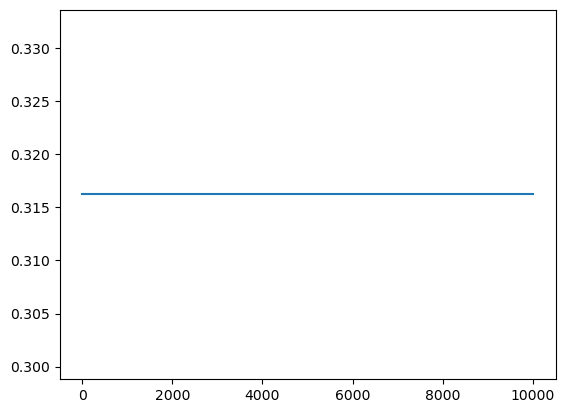

In [70]:
plt.plot(alphalist, err_vec_val);


In [71]:
np.max(err_vec_val)  # Lasso kullanarak ulaşabildiğimiz maximum R2

0.3162028389311075

In [72]:
alphalist[np.argmax(err_vec_val)] # max deger icin alpha degeri

1.0

In [73]:
alphalist = 10**(np.linspace(0,4,200)) # Daha geniş aralıkta inceleme yapmak için np.linspace() parametrelerini değiştirin
err_vec_val2 = np.zeros(len(alphalist))
err_vec_train2 = np.zeros(len(alphalist))

for index, curr_alpha in enumerate(alphalist):

    # Her bir döngüde ilk olarak Scaling uygula ve sonrasında belirtilen alpha değerinde Lasso'yu çalıştır
    steps = [('standardize', StandardScaler()),
             ('ridge', Ridge(alpha = curr_alpha, tol=0.1))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)

    val_set_pred = pipe.predict(X_val.values)
    err_vec_val2[index] = mean_squared_error(y_val, val_set_pred)

In [74]:
np.max(err_vec_val2)  # Ridge kullanarak ulaşabildiğimiz maximum R2

0.20932231438571733

In [75]:
alphalist[np.argmax(err_vec_val2)] # max deger icin alpha degeri

10000.0

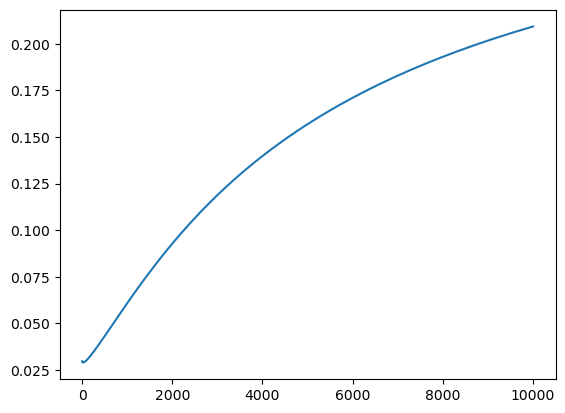

In [76]:
plt.plot(alphalist, err_vec_val2);

In [77]:
# en iyi modeli bulmak icin cross-validetion

from sklearn.model_selection import KFold


# Verimizi 5 parçaya ayırmaya deneyelim (n_splits=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validation sonuçlarını toplayacağımız listeler
cv_lm_r2 = []
cv_lm_reg_r2 = []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

    # Modellerin oluşturulması
    lm = LinearRegression()
    lm_reg = Ridge(alpha=0.20932231438571733)
    
    # Modellerin eğitimi
    lm.fit(X_train, y_train)
    cv_lm_r2.append(round(lm.score(X_val, y_val),3))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2.append(round(lm_reg.score(X_val_scaled, y_val),3))

# Sonuçların toplanması
print('Linear Regression R2:', cv_lm_r2)
print('Ridge Regression R2:', cv_lm_reg_r2, '\n')

print(f'Linear Regression R2: {np.mean(cv_lm_r2):.3f} +- {np.std(cv_lm_r2):.3f}')
print(f'Ridge Regression R2: {np.mean(cv_lm_reg_r2):.3f} +- {np.std(cv_lm_reg_r2):.3f}')

Linear Regression R2: [0.904, 0.914, 0.925, 0.897, 0.883]
Ridge Regression R2: [0.904, 0.914, 0.925, 0.897, 0.883] 

Linear Regression R2: 0.905 +- 0.014
Ridge Regression R2: 0.905 +- 0.014


In [78]:
lr3 = LinearRegression()


# Modeli test etme
lr3.fit(X_test, y_test)

# Test verisetindeki R2 Değeri
r_squared3 = lr3.score(X_test, y_test)
print("R2:", round(r_squared3,3))

# Adjusted R2 Değeri
adjusted_r_squared3 = 1 - (1-r_squared3)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared3,3))


R2: 0.931
Adjusted R2: 0.929


In [79]:
lr3.predict(X_test) # logaritmasi alinmis degerler kullandigimizdan

array([13.57697097, 12.29237179, 12.23005688, 12.67683254, 12.2384068 ,
       12.96310845, 13.05513293, 12.45225974, 13.345505  , 12.57250377,
       12.77342397, 13.26343709, 12.73761254, 13.47764782, 12.67441329,
       13.33191949, 13.55015889, 13.08069157, 12.93535073, 12.1281111 ,
       13.26779176, 11.88743299, 12.27930037, 11.94857691, 13.05301412,
       12.93142943, 12.37739448, 11.2804746 , 12.49898933, 12.48292383,
       13.67631187, 12.57959656, 12.76592179, 12.79594833, 11.78673614,
       11.91890653, 13.21837164, 12.89068288, 13.25831185, 13.26768046,
       13.87384547, 12.49390598, 13.46416212, 12.57254437, 13.07779304,
       13.15203626, 12.7067355 , 13.04605402, 12.21102775, 12.86675325,
       12.62755836, 13.11317611, 13.2277113 , 13.1061461 , 12.86795973,
       12.23930584, 12.53667429, 12.82225757, 12.92781813, 12.45748578,
       13.3995126 , 14.19453974, 13.31205516, 12.15634384, 13.55093824,
       13.06251301, 12.65798924, 13.05308176, 13.46974537, 12.53

In [80]:
np.exp(lr3.predict(X_test)) # eksponansiyelini aliyoruz

array([ 787777.50460082,  218026.47769906,  204854.83485965,
        320242.0976837 ,  206572.51701744,  426389.46685837,
        467489.8557855 ,  255827.77375539,  624998.79194766,
        288515.40749355,  352717.93576965,  575754.7609948 ,
        340310.09908016,  713293.18829402,  319468.28658372,
        616565.28412186,  766936.19280756,  479592.26172329,
        414716.6210977 ,  185000.        ,  578267.44955483,
        145427.50428372,  215195.10612673,  154596.98500175,
        466500.38486349,  413093.57923215,  237374.53315228,
         79258.86917611,  268066.22246037,  263794.01354198,
        870055.14245664,  290569.0609364 ,  350081.68382725,
        360752.83281524,  131496.58166618,  150077.41295494,
        550384.07841971,  396599.75582123,  572811.42809897,
        578203.09622991, 1060069.96869526,  266707.00515945,
        703738.50230941,  288527.12189038,  478204.16174244,
        515058.75710604,  329962.89748157,  463264.76682697,
        200993.48072251,

In [81]:
# Saving the model with Statsmodels:

sm2.save('cars_sm_model.pkl')

In [82]:
#Saving the linear model
from joblib import dump, load

dump(lm , 'cars_sk_model.pkl')
lr2 = load('cars_sk_model.pkl')

In [83]:
#creating new featuare with motor_gucu and motor_hacmi
cars['performans'] = cars['motor_gucu'] / cars['motor_hacmi']

In [84]:
cars['performans']

0       0.048606
1       0.095194
2       0.056320
3       0.060897
4       0.065707
          ...   
2146    0.061151
2148    0.065274
2149    0.069182
2151    0.080053
2152    0.080910
Name: performans, Length: 1851, dtype: float64

In [85]:
cars['kullanim'] = cars['kilometre'] / cars['yil']

In [91]:
cars['kullanim']

0       23.529412
1       14.500000
2       24.142857
3       20.454545
4       18.500000
          ...    
2146    14.500000
2148    14.454545
2149    12.777778
2151    21.500000
2152    16.454545
Name: kullanim, Length: 1851, dtype: float64

In [95]:
cars['kullanim'] = cars['kilometre'] / cars['yil'] 

In [96]:
X = cars.loc[:,['yil','kilometre','yakit_deposu','motor_hacmi','motor_gucu','boyali_parca','degisen_parca',
                'marka_Aston_Martin','marka_Audi','marka_BMW','marka_Chery','marka_Chevrolet',
                'marka_Citroen','marka_DS_Automobiles','marka_Dacia','marka_Daewoo','marka_Ferrari',
                'marka_Fiat','marka_Ford','marka_Geely','marka_Honda','marka_Hyundai','marka_Kia',
                'marka_Lada','marka_MINI','marka_Maserati','marka_Mazda','marka_Mercedes_Benz',
                'marka_Mitsubishi','marka_Nissan','marka_Opel', 'marka_Peugeot',
       'marka_Porsche', 'marka_Proton', 'marka_Renault', 'marka_Rover',
       'marka_Seat', 'marka_Skoda', 'marka_Suzuki', 'marka_Tata',
       'marka_Tofaş', 'marka_Toyota', 'marka_Volkswagen', 'marka_Volvo',
       'vites_tipi_Otomatik', 'vites_tipi_Yarı_Otomatik', 'yakit_tipi_Dizel',
       'yakit_tipi_Hibrit', 'yakit_tipi_LPG_Benzin', 'cekis_Arkadan_İtiş',
       'cekis_Önden_Çekiş','performans','kullanim']]
y = cars.fiyat_log


In [97]:
#  performans ve kullanim eklenmis hali

lr4 = LinearRegression()

# Modeli test etme
lr4.fit(X_train, y_train)

# Test verisetindeki R2 Değeri
r_squared4 = lr4.score(X_train, y_train)
print("R2:", round(r_squared4,3))

# Adjusted R2 Değeri
adjusted_r_squared4 = 1 - (1-r_squared4)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared4,3))


R2: 0.931
Adjusted R2: 0.929
